Load and inspect data

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw_sales_data.csv")
df.head()
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   str    
 2   Sales_Rep             1000 non-null   str    
 3   Region                1000 non-null   str    
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   str    
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   str    
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   str    
 12  Sales_Channel         1000 non-null   str    
 13  Region_and_Sales_Rep  1000 non-null   str    
dtypes: float64(4), int64(2), str(8)
memory usage: 109.5 KB


Clean the data

In [3]:
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
df.drop(columns=["Region_and_Sales_Rep"], inplace=True)

df["Profit"] = (df["Unit_Price"] - df["Unit_Cost"]) * df["Quantity_Sold"]
df["Discounted_Sales"] = df["Sales_Amount"] * (1 - df["Discount"])


Save cleaned data:

In [4]:
df.to_csv("../data/cleaned_sales_data.csv", index=False)


Sales by Region

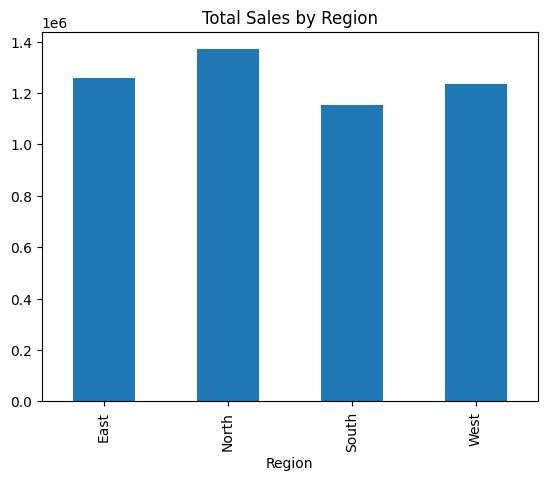

In [5]:

import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales_Amount"].sum()

plt.figure()
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.savefig("../charts/sales_by_region.png")
plt.show()


Sales by Category

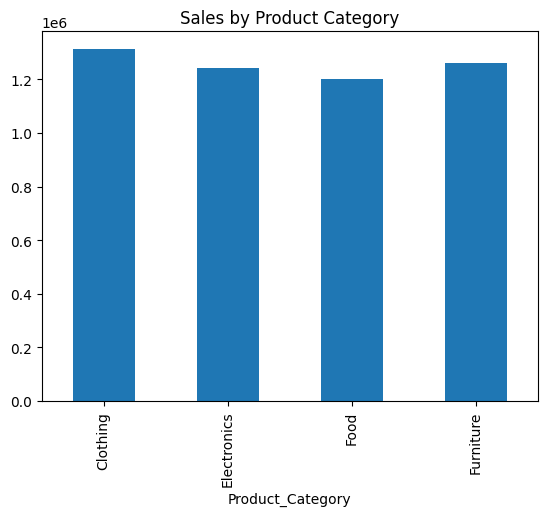

In [6]:

cat_sales = df.groupby("Product_Category")["Sales_Amount"].sum()

plt.figure()
cat_sales.plot(kind="bar")
plt.title("Sales by Product Category")
plt.savefig("../charts/sales_by_category.png")
plt.show()

Discount vs Profit (relationship)

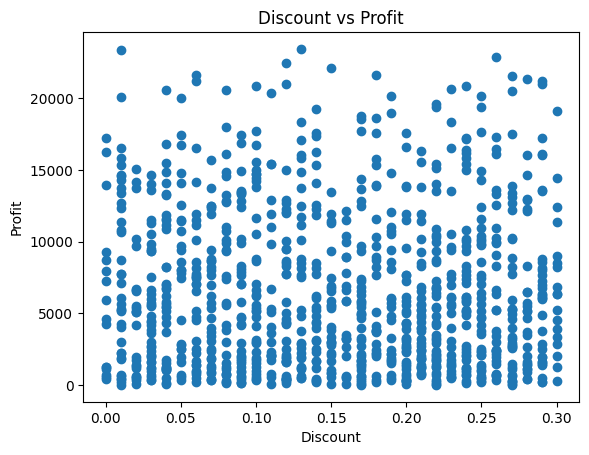

In [7]:
plt.figure()
plt.scatter(df["Discount"], df["Profit"])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.savefig("../charts/discount_vs_profit.png")
plt.show()
